In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
model = "ResNet-50"
# model = "ResNet-101"
# model = "Swin-T"
# model = "SegNet"

# Alivia's Paths
# train_loss_path = f"/content/drive/MyDrive/Final Year Project/8th Sem/Loss Plots/Results/{model}/train_loss.txt"
# valid_loss_path = f"/content/drive/MyDrive/Final Year Project/8th Sem/Loss Plots/Results/{model}/valid_loss.txt"

# Dibyarup's Paths
train_loss_path = f"/content/drive/MyDrive/8th Sem BTech/0) Final Yr. Project - 8th Sem/Model and Loss/Results/{model}/train_loss.txt"
valid_loss_path = f"/content/drive/MyDrive/8th Sem BTech/0) Final Yr. Project - 8th Sem/Model and Loss/Results/{model}/valid_loss.txt"

In [4]:
pd.set_option('display.float_format', '{:.16f}'.format)
df_train = pd.read_csv(train_loss_path, delimiter="\t", names=["Epoch_No","Loss"])

# print(df_train, type(df_train))

In [5]:
pd.set_option('display.float_format', '{:.16f}'.format)
df_valid = pd.read_csv(valid_loss_path, delimiter="\t", names=["Epoch_No","Loss"])

# print(df_valid, type(df_valid))

In [6]:
def filter_epoch_extractor(x):
    # This filter extracts the epoch number from the string of format -> Epoch[1/300]:
    first_split = x.str.split('[').str[1]
    second_split = first_split.str.split('/').str[0]
    return second_split.astype(int)
epoch_no_train = filter_epoch_extractor(df_train["Epoch_No"])
# print(epoch_no_train)

In [7]:
def filter_epoch_extractor(x):
    # This filter extracts the epoch number from the string of format -> Epoch[1/300]:
    first_split = x.str.split('[').str[1]
    second_split = first_split.str.split('/').str[0]
    return second_split.astype(int)
epoch_no_valid = filter_epoch_extractor(df_valid["Epoch_No"])
# print(epoch_no_valid)

<ipython-input-26-8e0d6cdaa148>:13: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 1.1, 0.01)


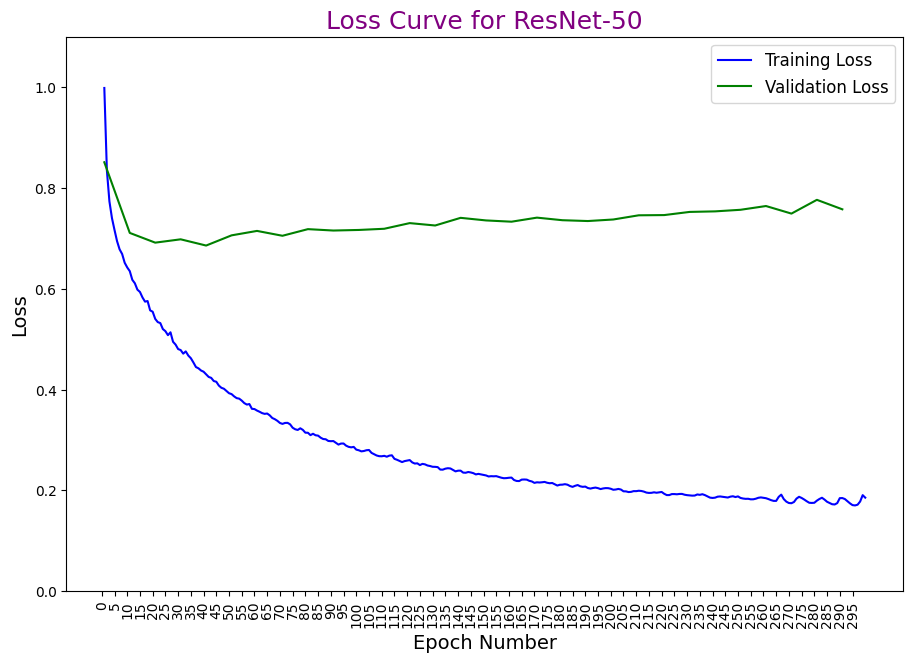

In [26]:
# Plotting
plt.figure(figsize=(10.8, 7.2))
plt.plot(epoch_no_train, df_train['Loss'], color='blue', markerfacecolor='cyan', label='Training Loss')
plt.plot(epoch_no_valid, df_valid['Loss'], color = 'green', markerfacecolor='blue', label='Validation Loss')

# Adding labels and title
plt.xlabel('Epoch Number', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title(f"Loss Curve for {model}", color='purple', fontsize=18)

# Scaling
plt.xticks(range(0, 300, 5), rotation=90)
plt.ylim(0, 1.1, 0.00000001)

# Display the legend
plt.legend(fontsize='large')

# Display the plot
# plt.grid(True)
plt.show()
